# Markov Chain Monte Carlo (MCMC) Basics
Notebook that walks through the background and basics of MCMC w/ explanations and examples.  

References:   
[1] Andrieu, C., de Freitas, N., Doucet, A. et al. An Introduction to MCMC for Machine Learning.   
Machine Learning 50, 5–43 (2003). https://doi.org/10.1023/A:1020281327116

## Rejection Sampling
Code below contains a basic implementation of rejection sampling along with a simple example.


In [2]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Target distribution: Gaussian mixed model
def p(x):
    return norm.pdf(x, loc=30, scale=10) + norm.pdf(x, loc=80, scale=20)

# Proposal distribution: Univariate Gaussian (i.e., normal distribution)
def q(x):
    return norm.pdf(x, loc=50, scale=30)

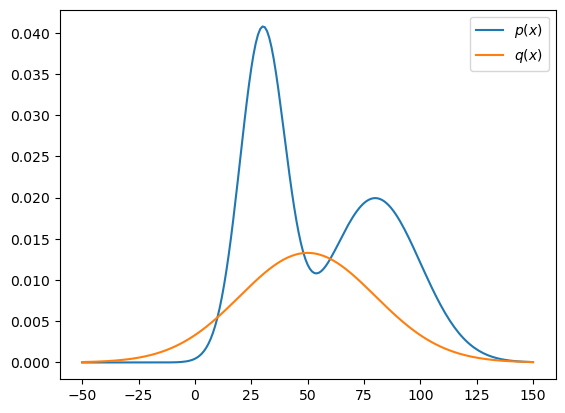

In [5]:
# visualize Target and Proposal distributions
x = np.arange(-50, 151)
fig, ax = plt.subplots()
ax.plot(x, p(x), label=r"$p(x)$")
ax.plot(x, q(x), label=r"$q(x)$")
plt.legend()
plt.show()

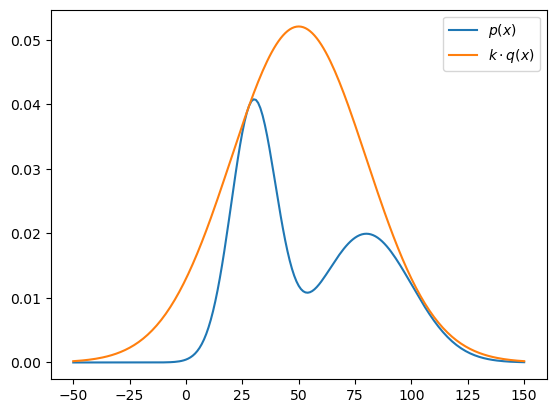

In [6]:
# Scale the proposal distribution to encapsulate the target distribution
k = max(p(x) / q(x))

# Visualize to check 
fig, ax = plt.subplots()
ax.plot(x, p(x), label=r"$p(x)$")
ax.plot(x, k * q(x), label=r"$k \cdot q(x)$")
plt.legend()
plt.show()

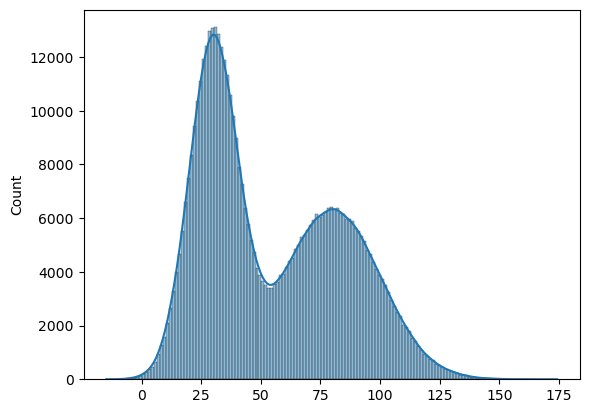

In [15]:
# Rejection sampler: vectorized 
def rejection_sampler_vec(size):
    xs = np.random.normal(50, 30, size=size)
    cs = np.random.uniform(0, 1, size=size)
    mask = p(xs) / (k * q(xs)) > cs
    return xs[mask]  

# Rejection sampler: naive, serialized version 
def rejection_sampler_naive(size):
    pass

# Run with 10_000 samples
samples = rejection_sampler_vec(1_000_000)
# sns.distplot(samples)
sns.histplot(samples, kde=True)
# sns.histplot(data=samples, stat="density", alpha=0.4, kde=True, kde_kws={"cut": 3})
plt.show()